# 1. The Challenge

## 1.1 Competition Description

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges one to predict the final price of each home.

## 1. 2 Data Description

### File descriptions
- train.csv - the training set
- test.csv - the test set
- data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here
- sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model as lm
from sklearn import model_selection as ms

%matplotlib inline

In [2]:
#Importing files
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
#Getting data distribution summary
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [4]:
pandas_profiling.ProfileReport(train_df)

Number of variables,81
Number of observations,1460
Total Missing (%),5.9%
Total size in memory,924.0 KiB
Average record size in memory,648.1 B
Numeric,38
Categorical,43
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [5]:
#Creating lists of numeric & categorical features
num = []
cat = []
for col in train_df.columns:
    if col != 'Id':
        if train_df[col].dtype=='int64' or train_df[col].dtype=='float64':
            num.append(col)
        else:
            cat.append(col)

In [6]:
num.remove('SalePrice')

# 2. Bivariate Analyses

## 2.1 Numeric features

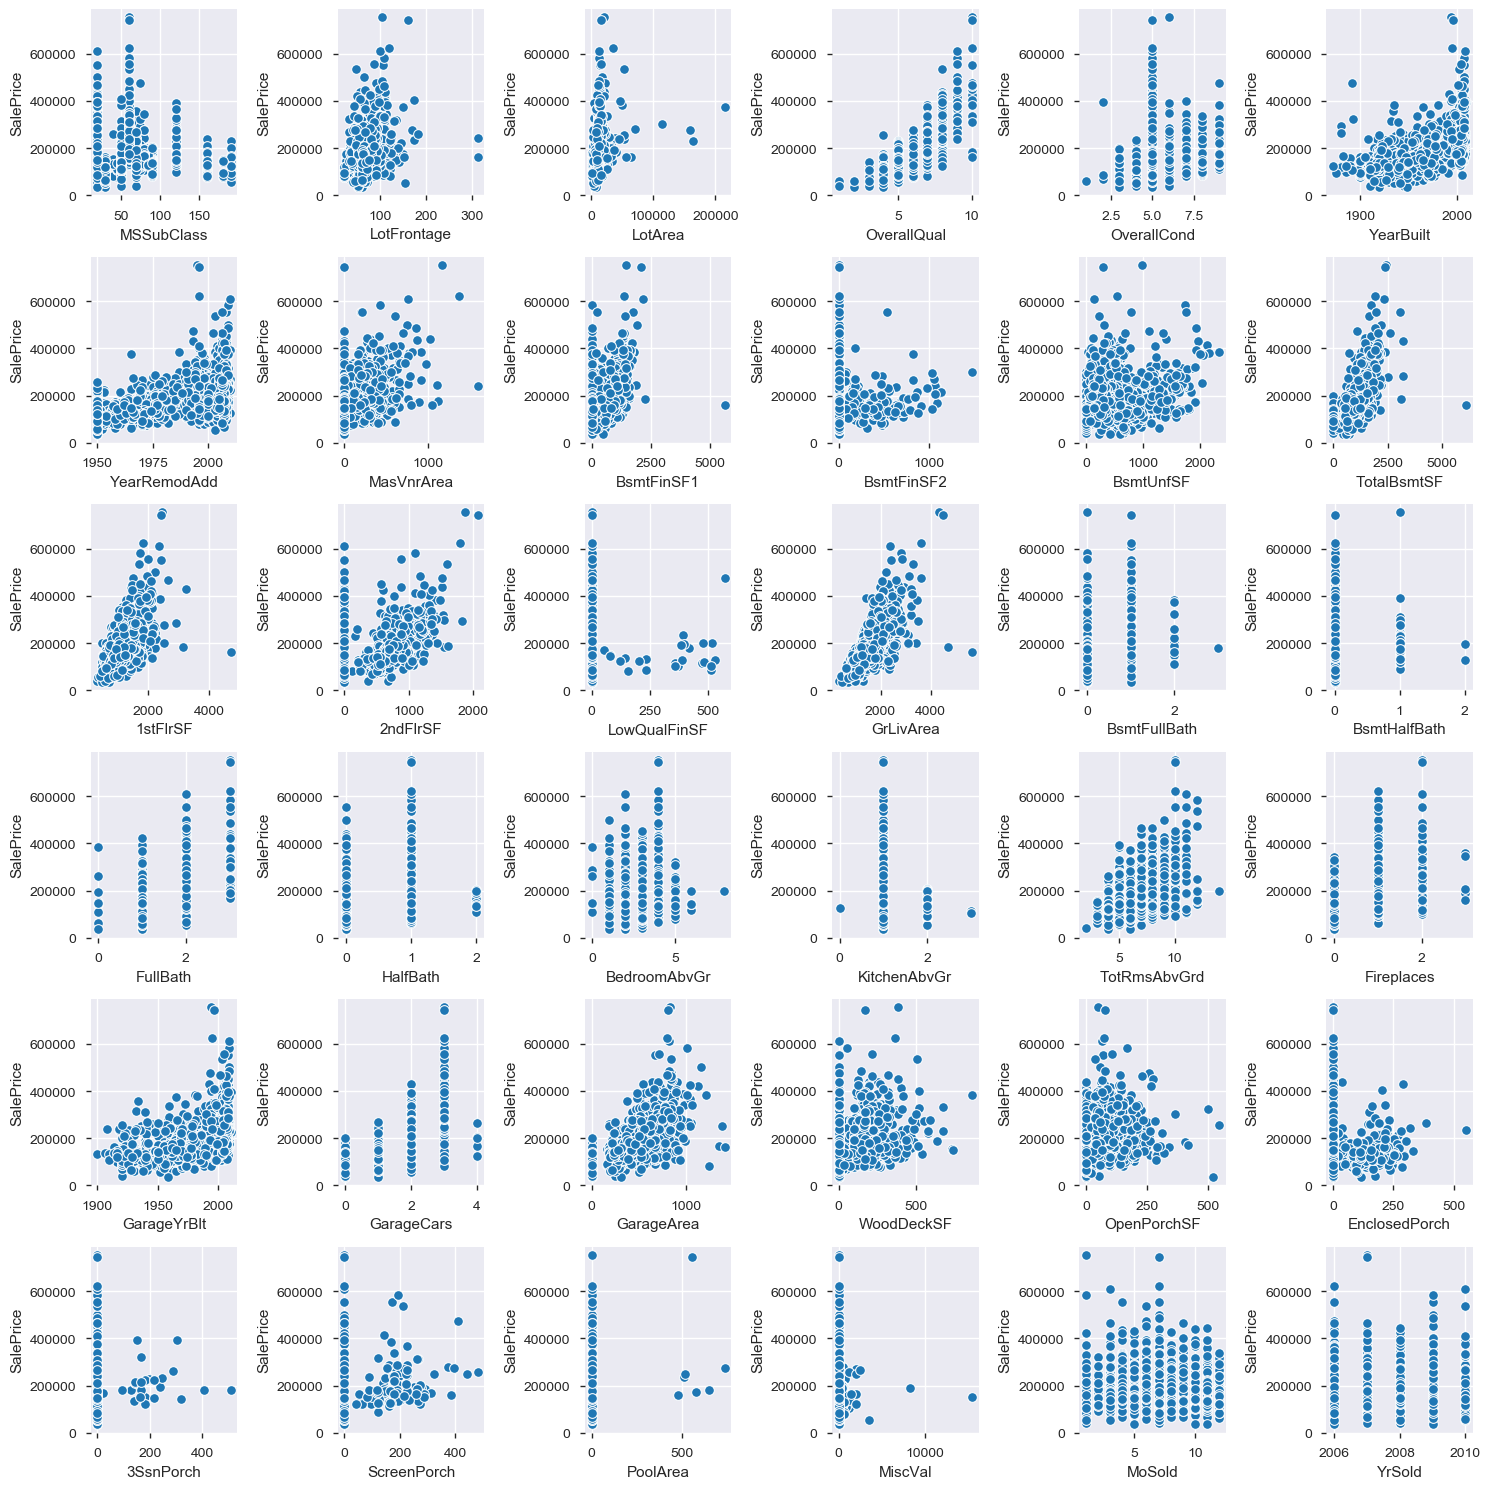

In [7]:
#Visualizing the distributions using scatterplot
y = train_df['SalePrice']

f = plt.figure(figsize=(15,15))
i = 1
for item in num:
    x = train_df[item]
    ax = f.add_subplot(6,6,i)
    sns.scatterplot(x,y)
    i += 1
    

plt.tight_layout()
plt.show()

In [8]:
#Computing the correlation between each numeric feature & SalePrice
corr_matrix = train_df.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

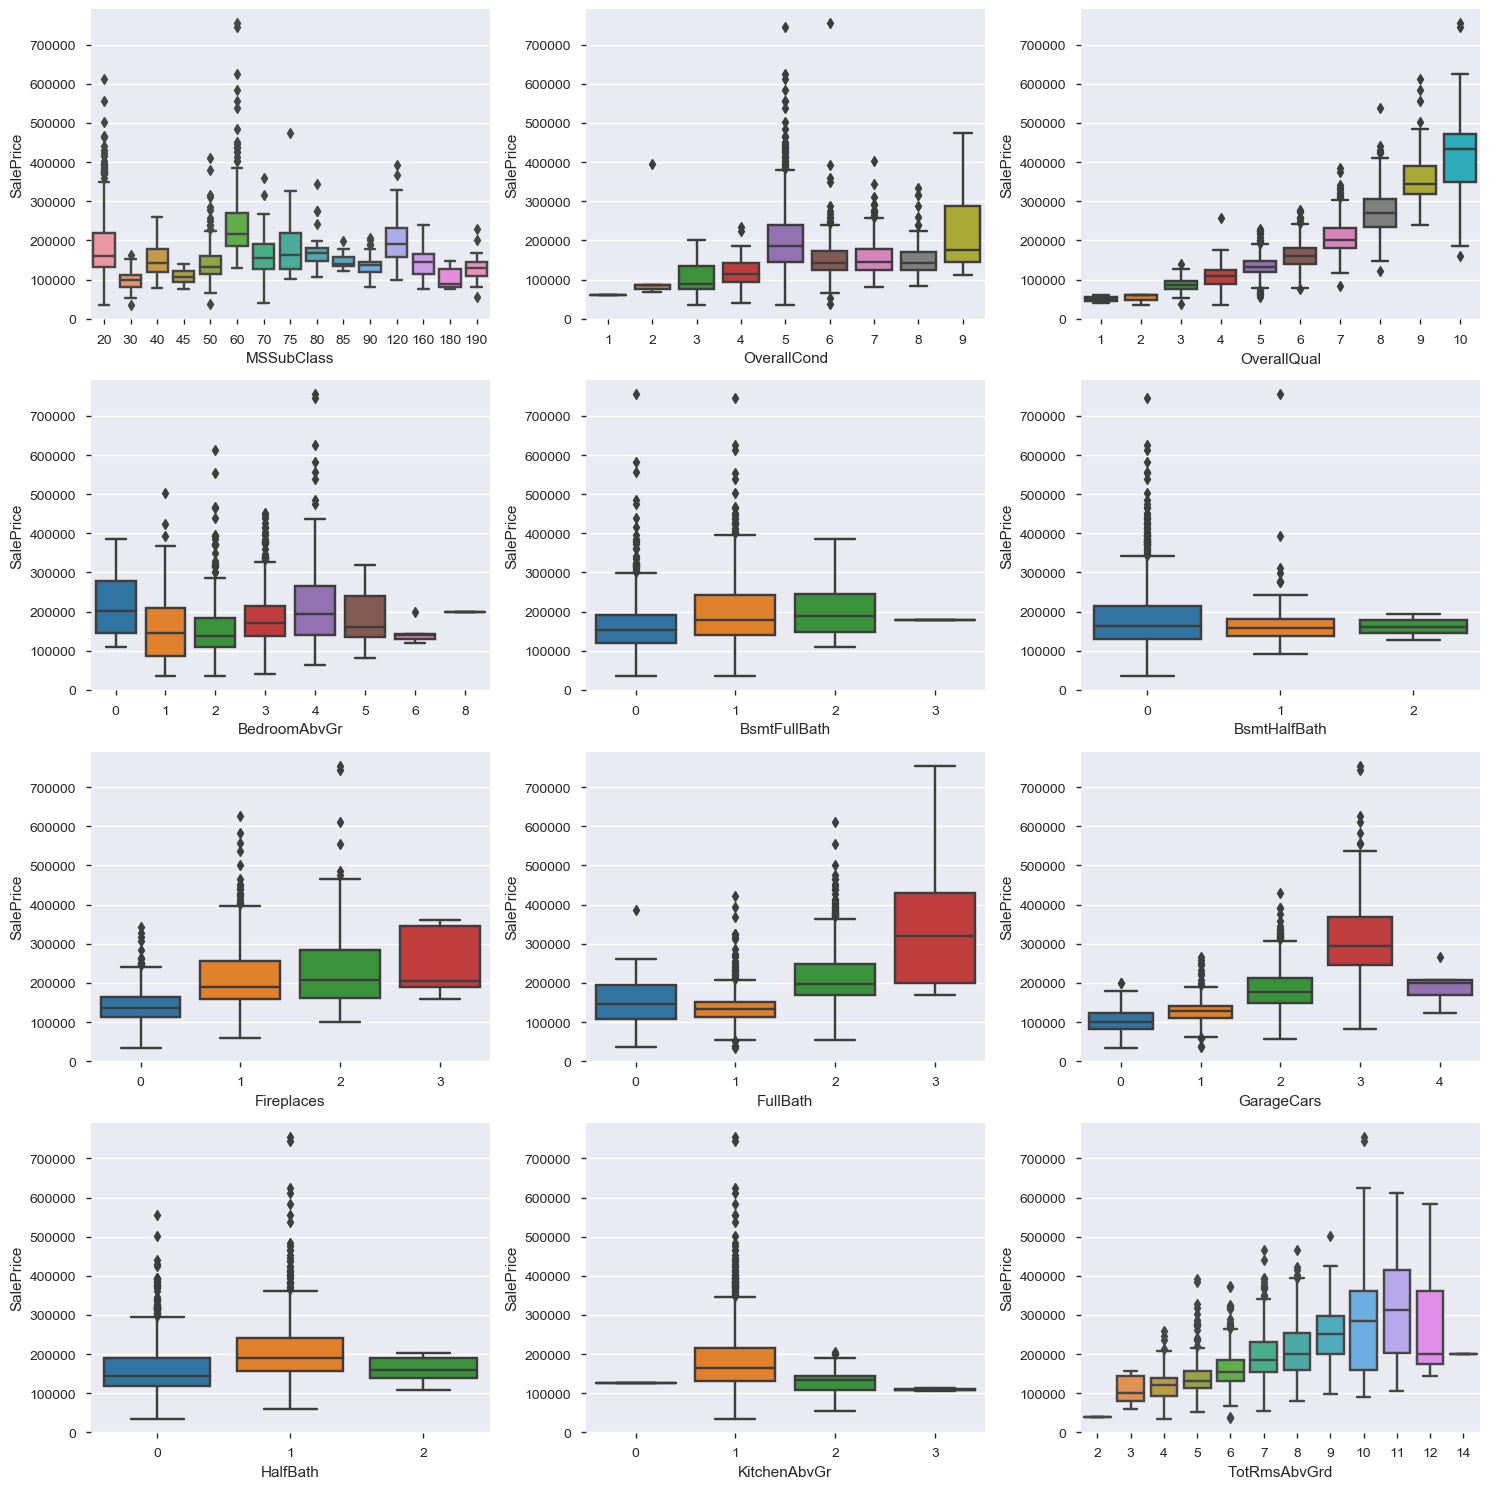

In [9]:
#Visualizing the distributions of features that are numeric but discrete using boxplot
num_cat_var = ['MSSubClass', 'OverallCond', 'OverallQual', 'BedroomAbvGr','BsmtFullBath', 'BsmtHalfBath', 'Fireplaces', 'FullBath', 'GarageCars', 'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd']
y = train_df['SalePrice']
f = plt.figure(figsize=(15,15))

i = 1
for item in num_cat_var:
    x = train_df[item]
    ax = f.add_subplot(4,3,i)
    sns.boxplot(x,y)
    i += 1

plt.tight_layout()
plt.show()

## 2.2 Categorical features

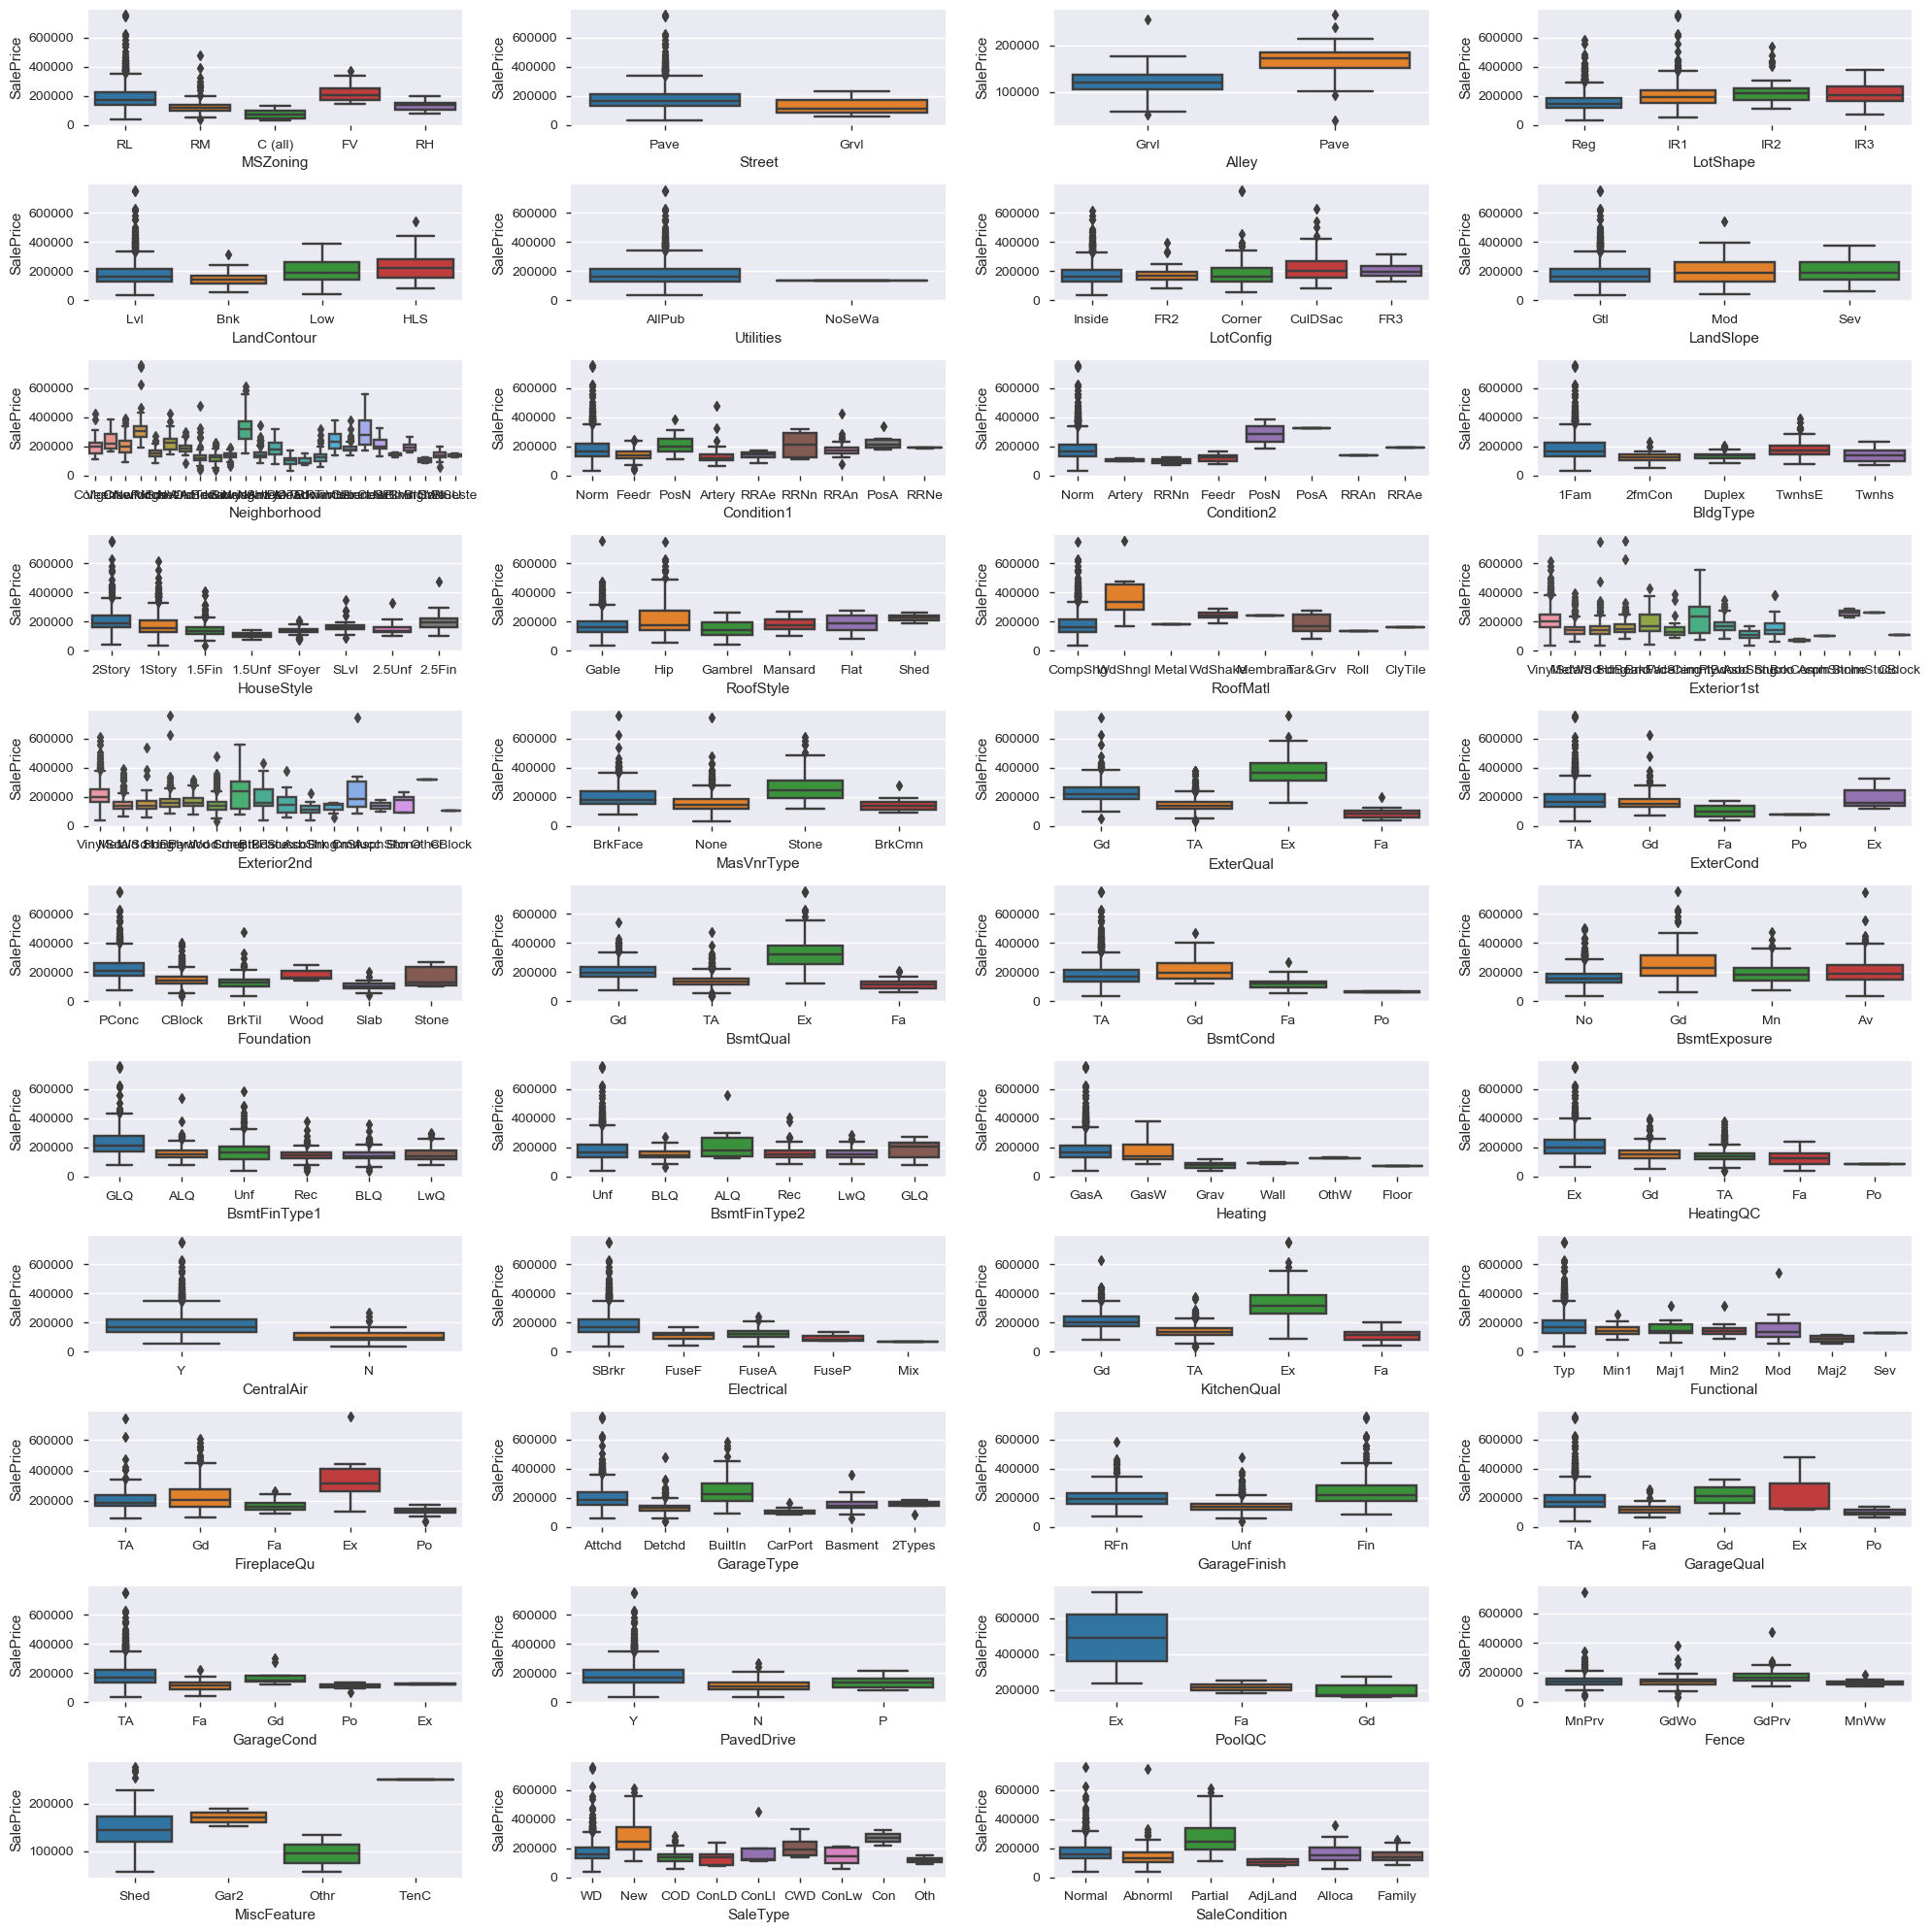

In [10]:
#Visualizing the distributions using boxplot
y = train_df['SalePrice']

f = plt.figure(figsize=(20,20))

i = 1
for item in cat:
    x = train_df[item]
    ax = f.add_subplot(11,4,i)
    sns.boxplot(x,y)
    i += 1

plt.tight_layout()
plt.show()

# 3. Preprocessing

In [11]:
#Creating preprocessing pipelines for numeric & categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('scaler', RobustScaler())])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [12]:
preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, num),
        ('cat', categorical_transformer, cat)])

# 4. Modeling

In [13]:
train_df.set_index(keys='Id',inplace=True)

In [14]:
X = train_df.drop('SalePrice', axis=1)
y = train_df['SalePrice']

In [15]:
X_train,X_test,y_train,y_test = ms.train_test_split(X,y,test_size=0.2)

In [16]:
#Adding linear regressor to pipeline
linreg = Pipeline(steps=[('preprocessor', preprocessor),
                     ('regressor', lm.LinearRegression())])

#Computing r2 score
linreg.fit(X_train,y_train)
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

R-squared score (training): 0.946
R-squared score (test): 0.729


In [17]:
#Adding random forest regressor to pipeline
rf = Pipeline(steps=[('preprocessor', preprocessor),
                     ('regressor', RandomForestRegressor(max_depth=50, random_state=0, n_estimators=100))])

#Computing r2 score
rf.fit(X_train,y_train)
print('R-squared score (training): {:.3f}'
     .format(rf.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(rf.score(X_test, y_test)))

R-squared score (training): 0.981
R-squared score (test): 0.882


# 4. Evaluation

In [18]:
#Evaluating rf model on test set

test_df.set_index(keys='Id',inplace=True)
X = test_df
test_df['SalePrice'] = linreg.predict(X)

#Saving to csv file
test_df.reset_index(level=0,inplace=True)
submission = test_df[['Id','SalePrice']]
submission.to_csv('submission.csv', encoding='utf-8', index=False)

This submission yielded a score of 0.19376 on Kaggle.

In [19]:
#Evaluating rf model on test set

test_df.set_index(keys='Id',inplace=True)
X = test_df
test_df['SalePrice'] = rf.predict(X)

#Saving to csv file
test_df.reset_index(level=0,inplace=True)
submission2 = test_df[['Id','SalePrice']]
submission2.to_csv('submission2.csv', encoding='utf-8', index=False)

This submission yielded a score of 0.14871 on Kaggle (ranked 3052 out of 5243), higher than that of the linear regression model.